In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import constants
from scipy import special
import glob

In [2]:
cap_files = glob.glob('darkres_cap_sims/*.csv')

In [3]:
def loader(filename):
    freq, ReY, ImY = np.loadtxt(filename, delimiter=',', skiprows=2, usecols=[0,5, 6], unpack=True)
    freq *= 1e9
    Y21 = ReY + 1j * ImY
    C = 1e12/(2*np.pi*freq*np.imag(1/Y21))
    return freq, C

In [4]:
def sorter(filename):
    return int(filename.split('.')[-2].split('_')[-1])
cap_files.sort(key=sorter)

In [5]:
dataset = np.array(list(map(loader, cap_files)))

In [6]:
freqs = dataset[0][0]
Cs = dataset[:, 1]
leg_frac = np.array([0, 10,20,30,40,50,100,200,300,400,500,600])/600
# frac_Cs = (Cs - Cs[0,:])/Cs[0,:]
N_legs = 100 - leg_frac
print (N_legs)
N = len(freqs)

[100.          99.98333333  99.96666667  99.95        99.93333333
  99.91666667  99.83333333  99.66666667  99.5         99.33333333
  99.16666667  99.        ]


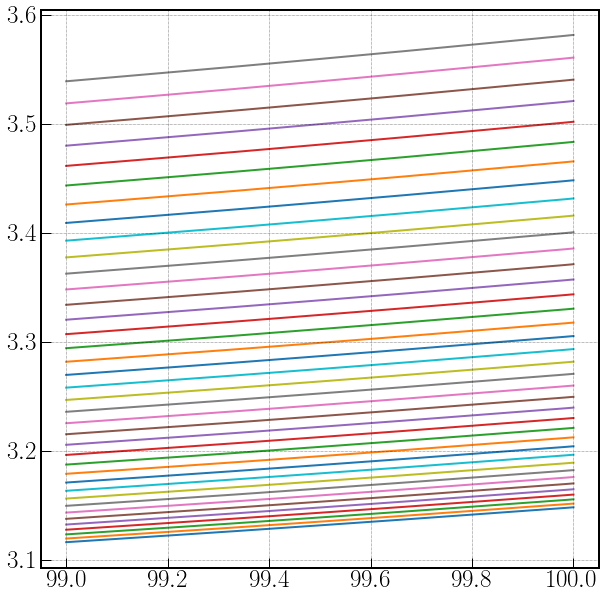

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(0,N,10):
    ax.plot(N_legs,  Cs[:,i] )
ax.grid();

In [9]:
avg_Cs = np.average(Cs, axis=1)

In [10]:
p = np.polyfit(N_legs, avg_Cs, 1)
fitted_Cs = np.polyval(p, N_legs)
print (p)

[ 0.03620919 -0.30531393]


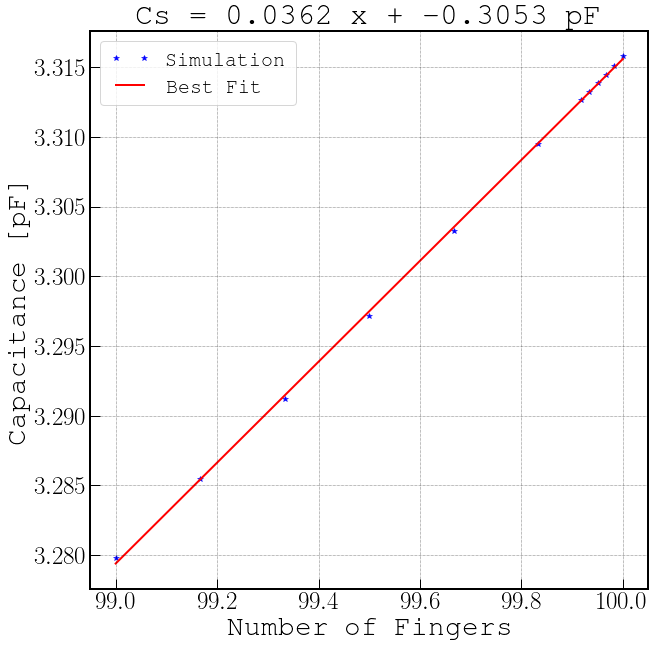

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(N_legs,  avg_Cs, 'b*', label='Simulation')
ax.plot(N_legs,  fitted_Cs ,'r', label='Best Fit')
ax.grid()
ax.set_xlabel(r'Number of Fingers') 
ax.set_ylabel(r'Capacitance [pF]') 
ax.legend(loc='best')
ax.set_title(r'Cs = {0:2.4f} x + {1:2.4f} pF'.format(*p)) ;

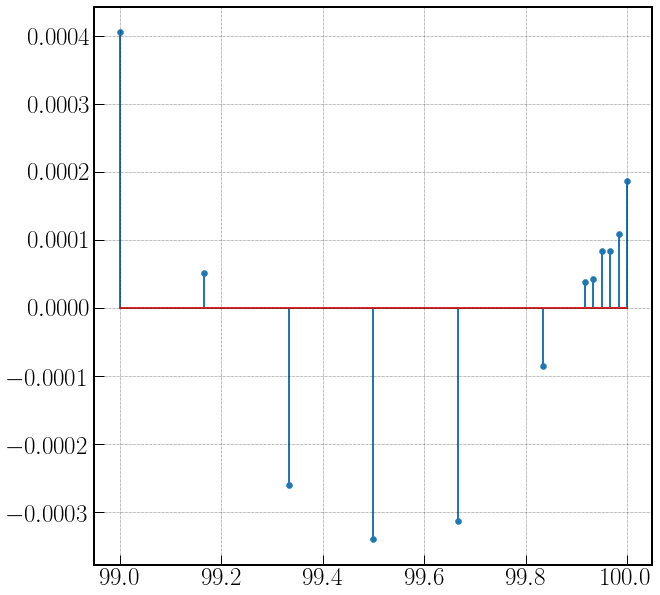

In [12]:
res = avg_Cs - fitted_Cs
fig, ax = plt.subplots(figsize=(10,10))
ax.stem(N_legs,  res)
ax.grid();